<a href="https://colab.research.google.com/github/SanketMN/Assignments/blob/main/RandomForest_asgnmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel('glass.xlsx')

In [ ]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [ ]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

## The dataset consists of various chemical components of glass, their percentagfe and refractive index. The last column indicates glass type such as window glass, tableware, or specialty glass types ##

In [ ]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [ ]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## we can see there are no null values in the dataset. ##

<Axes: >

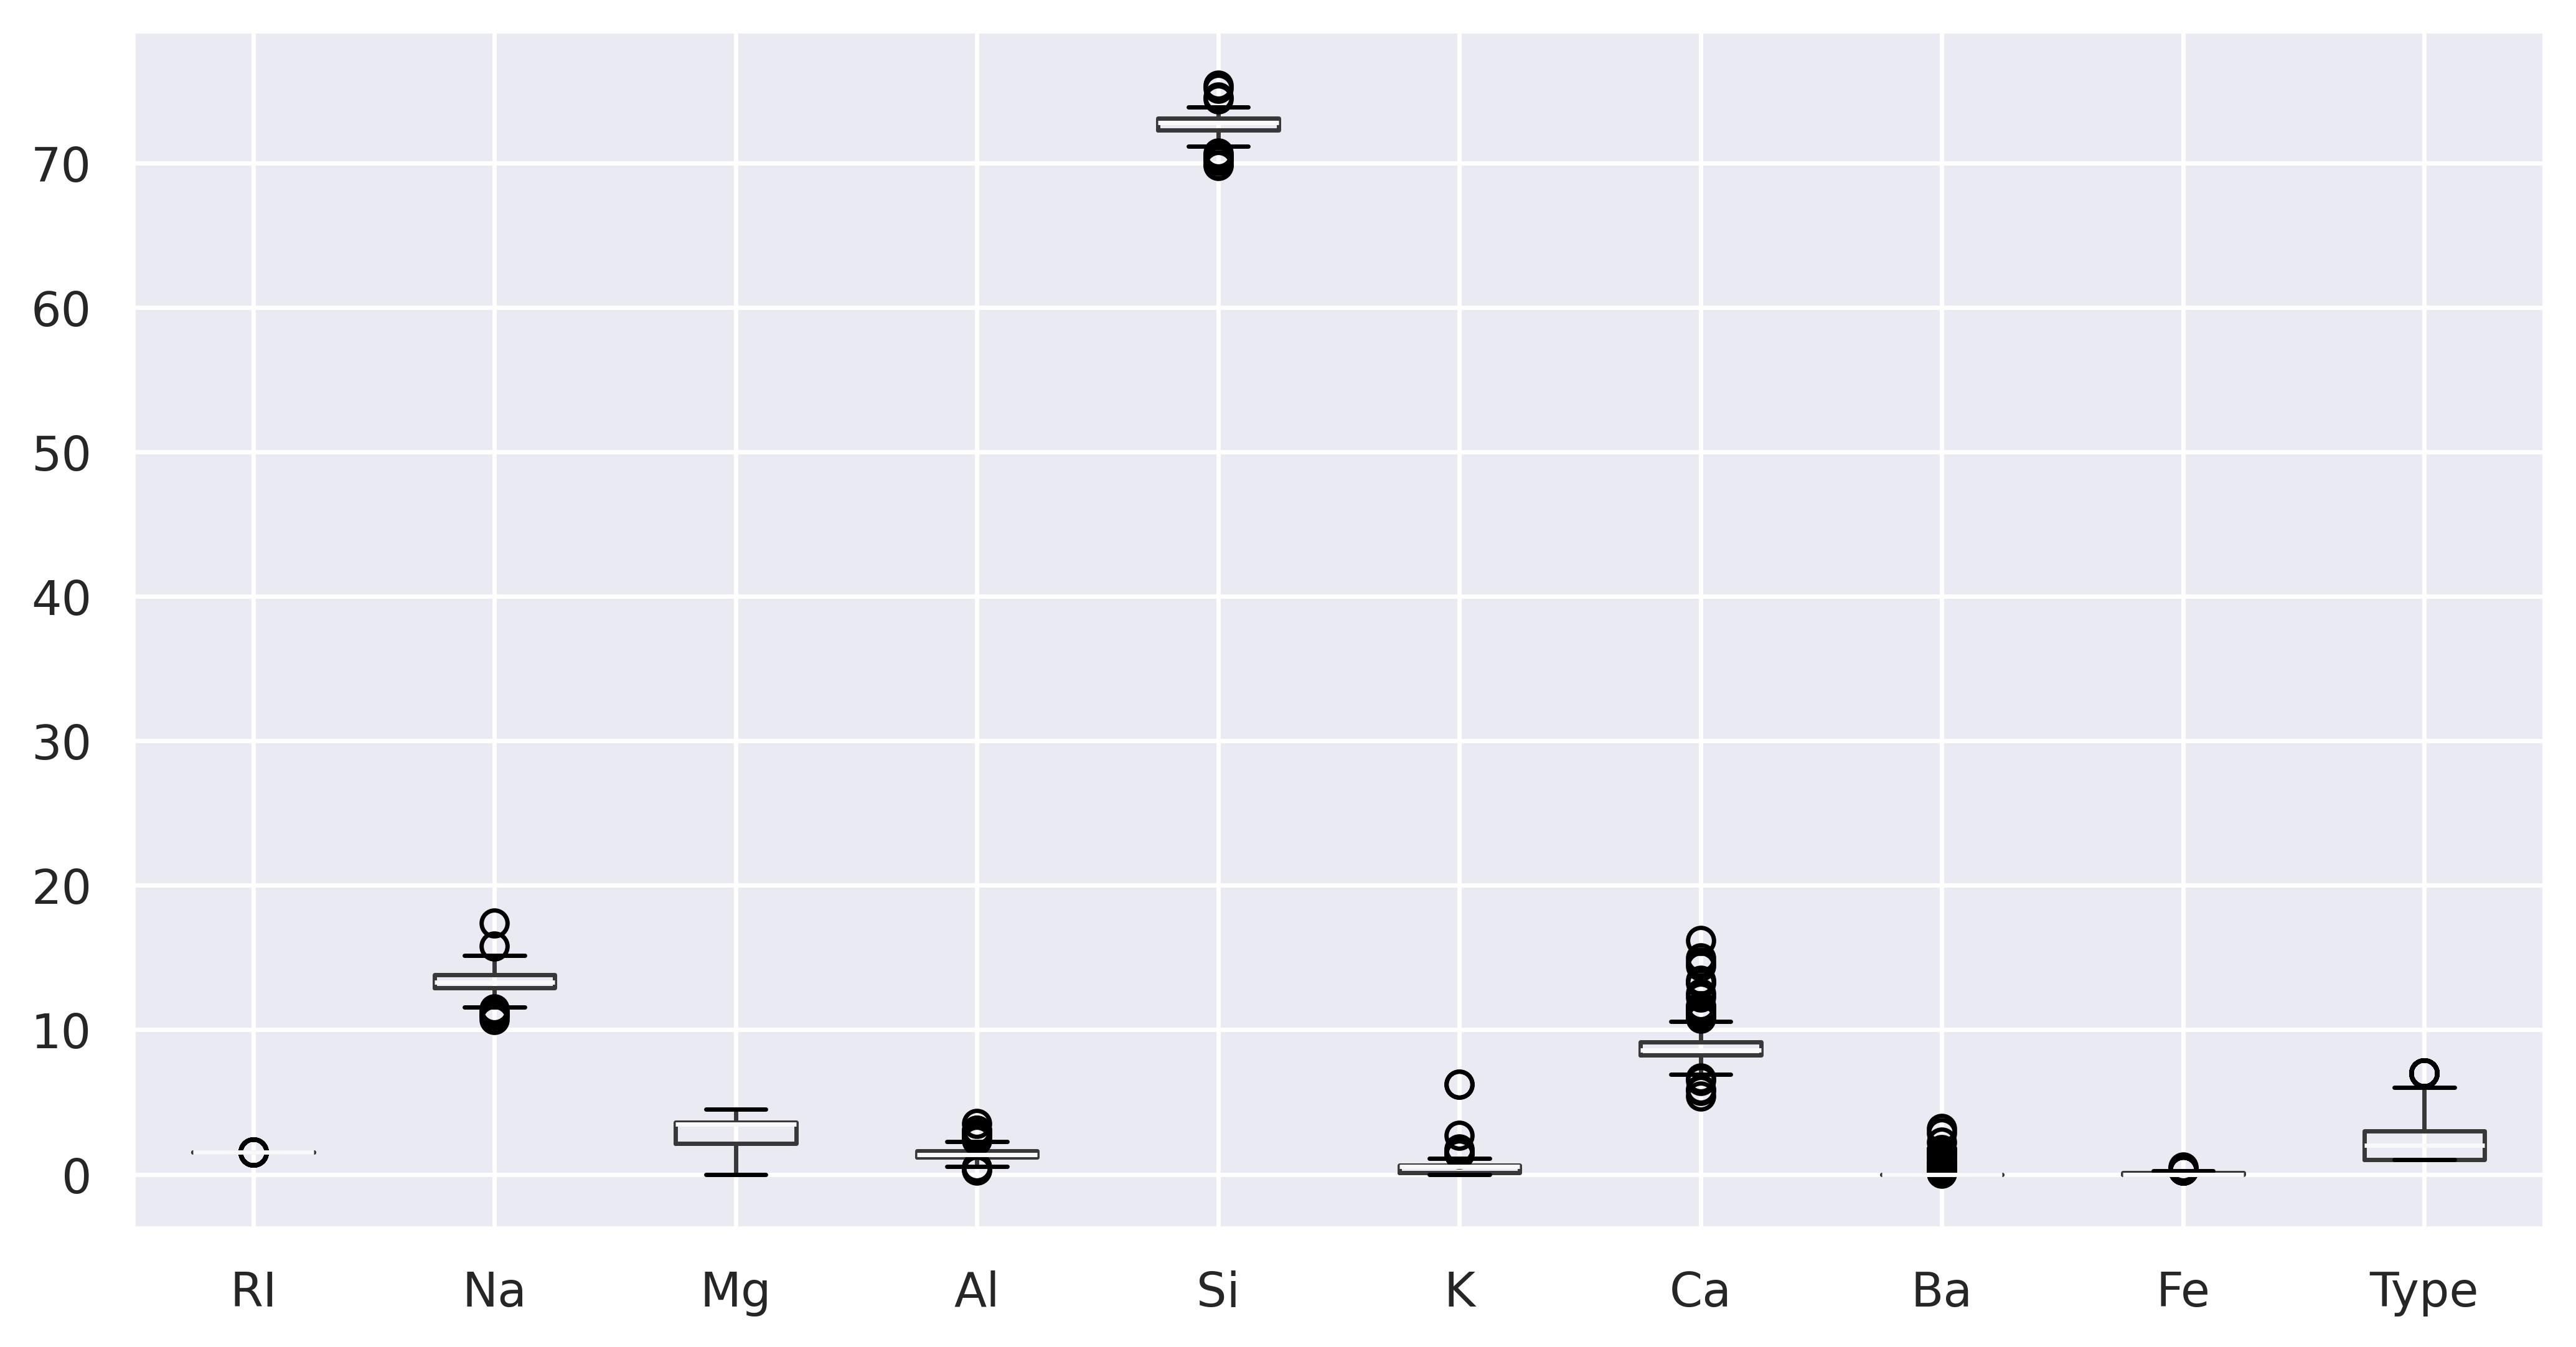

In [ ]:
df.boxplot()

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Type', ylabel='count'>

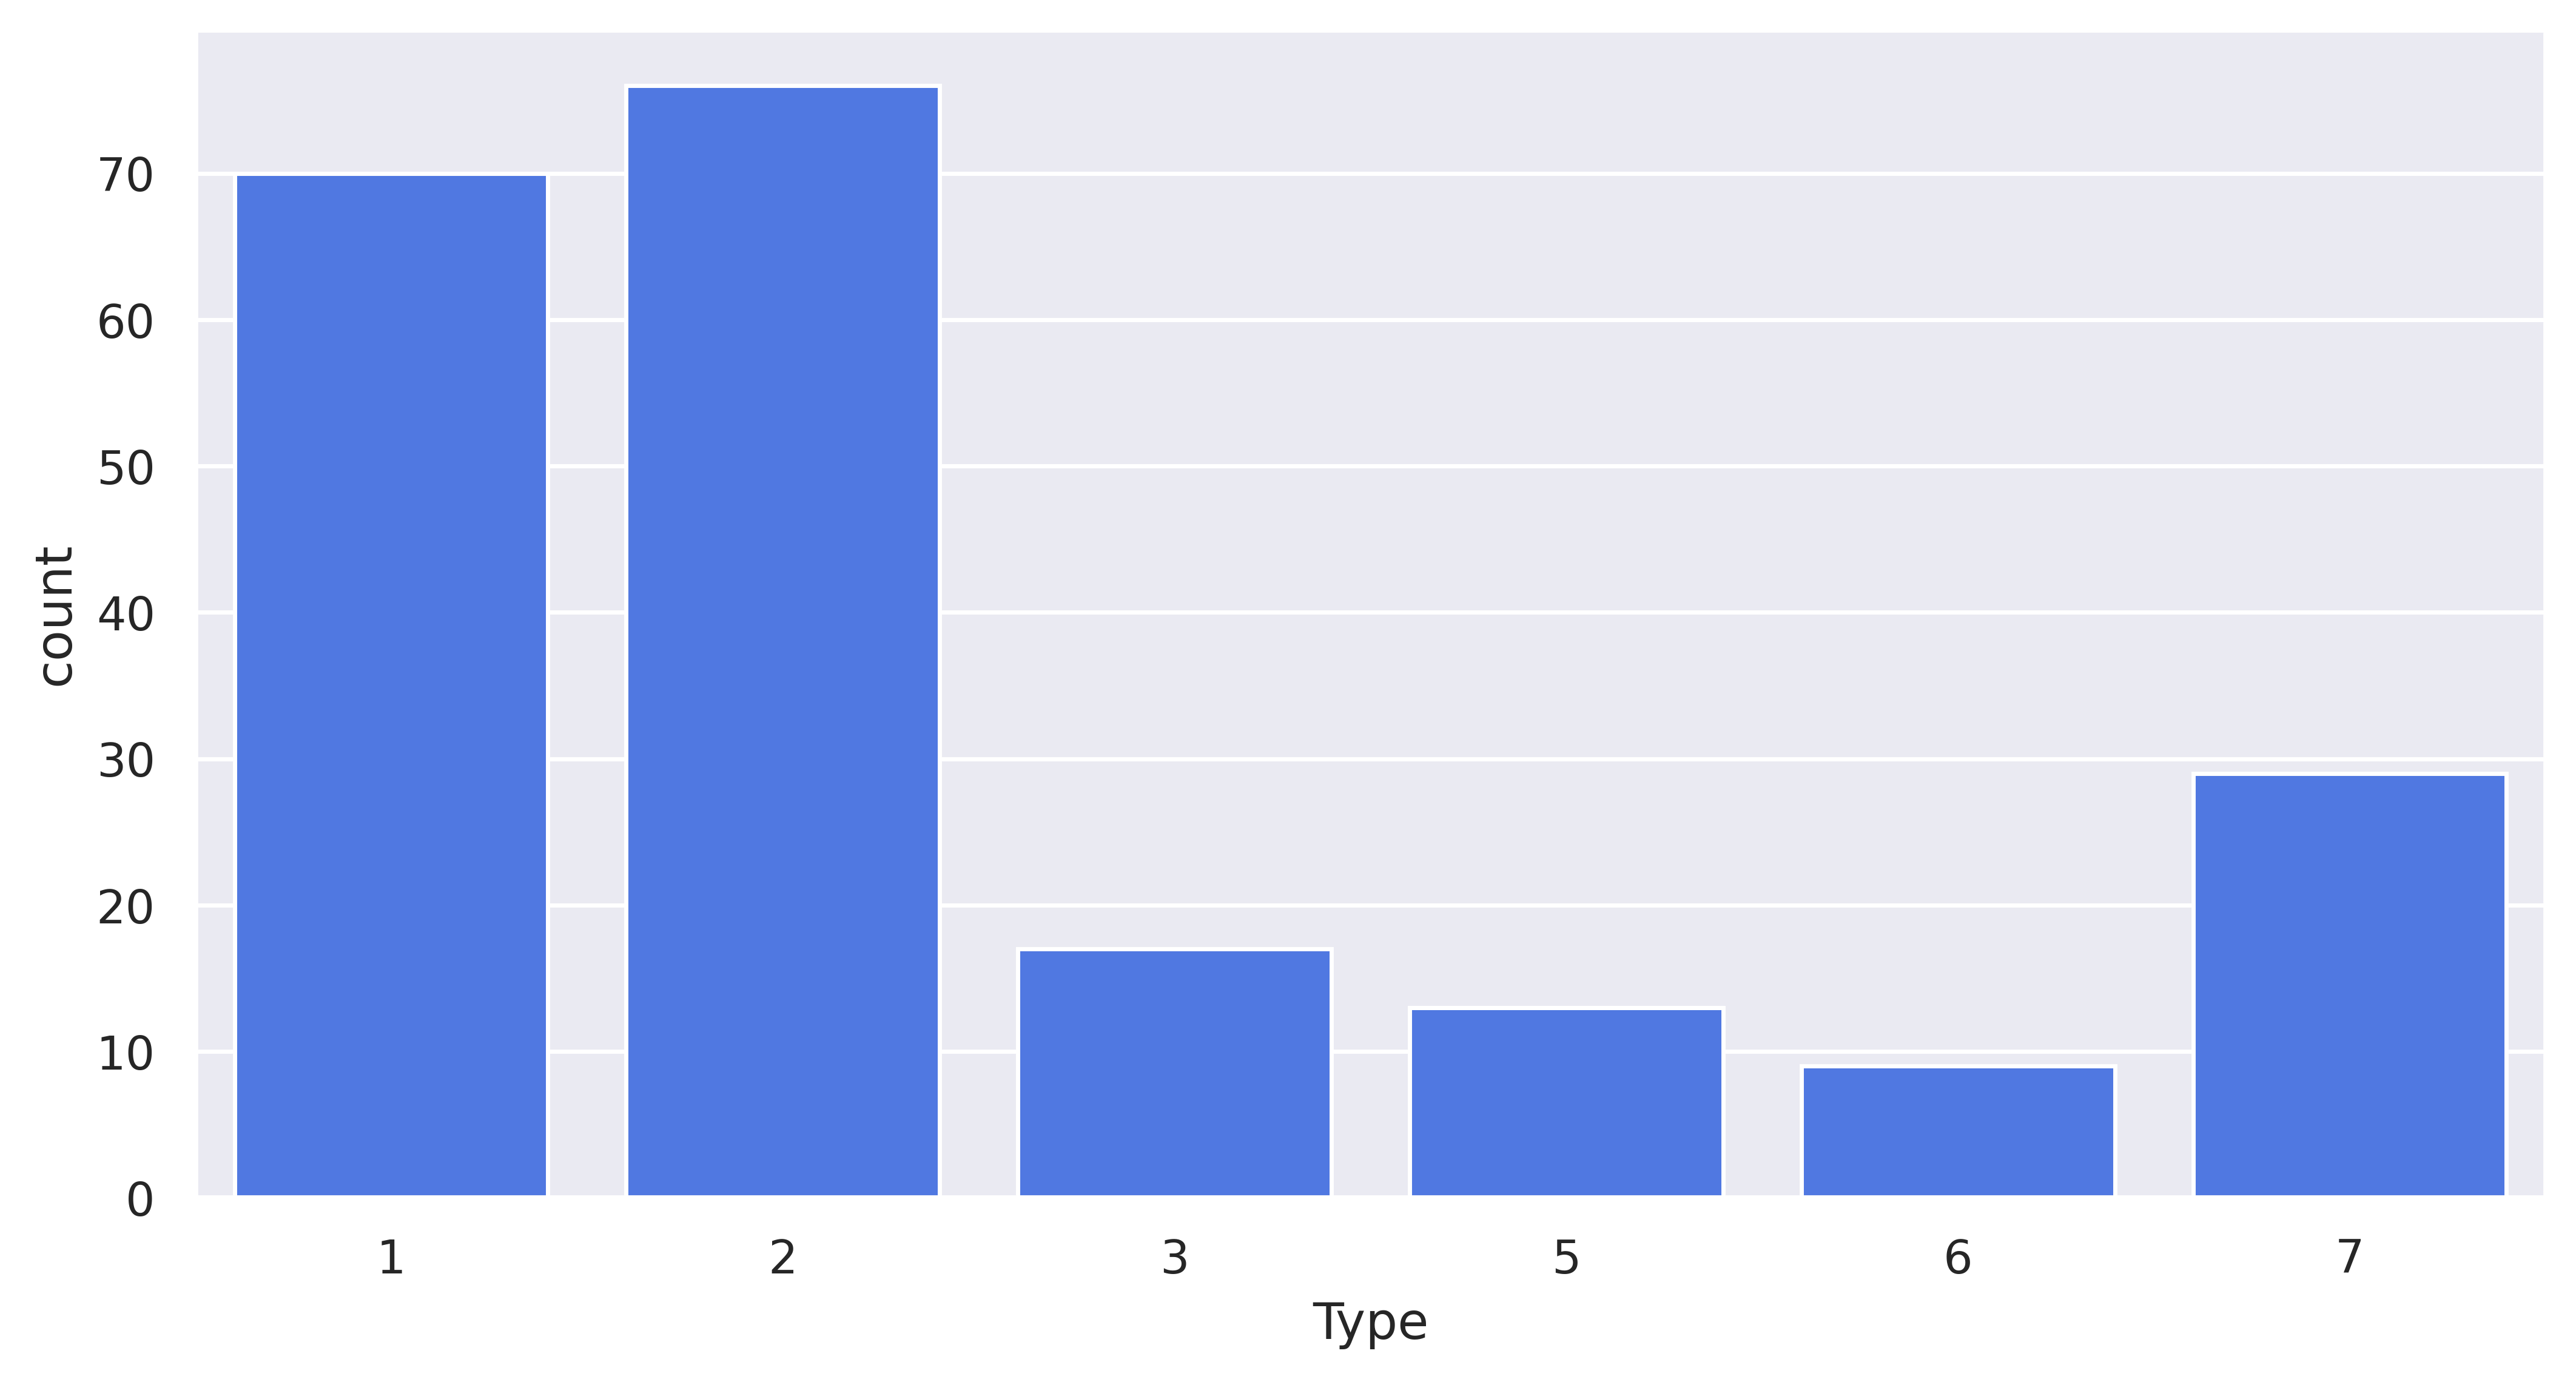

In [ ]:
sns.countplot(x = df['Type'])

## We can see that most number of glasses are type 1 and 2 followed by type 7 and then 3,5,6 ##

<Axes: >

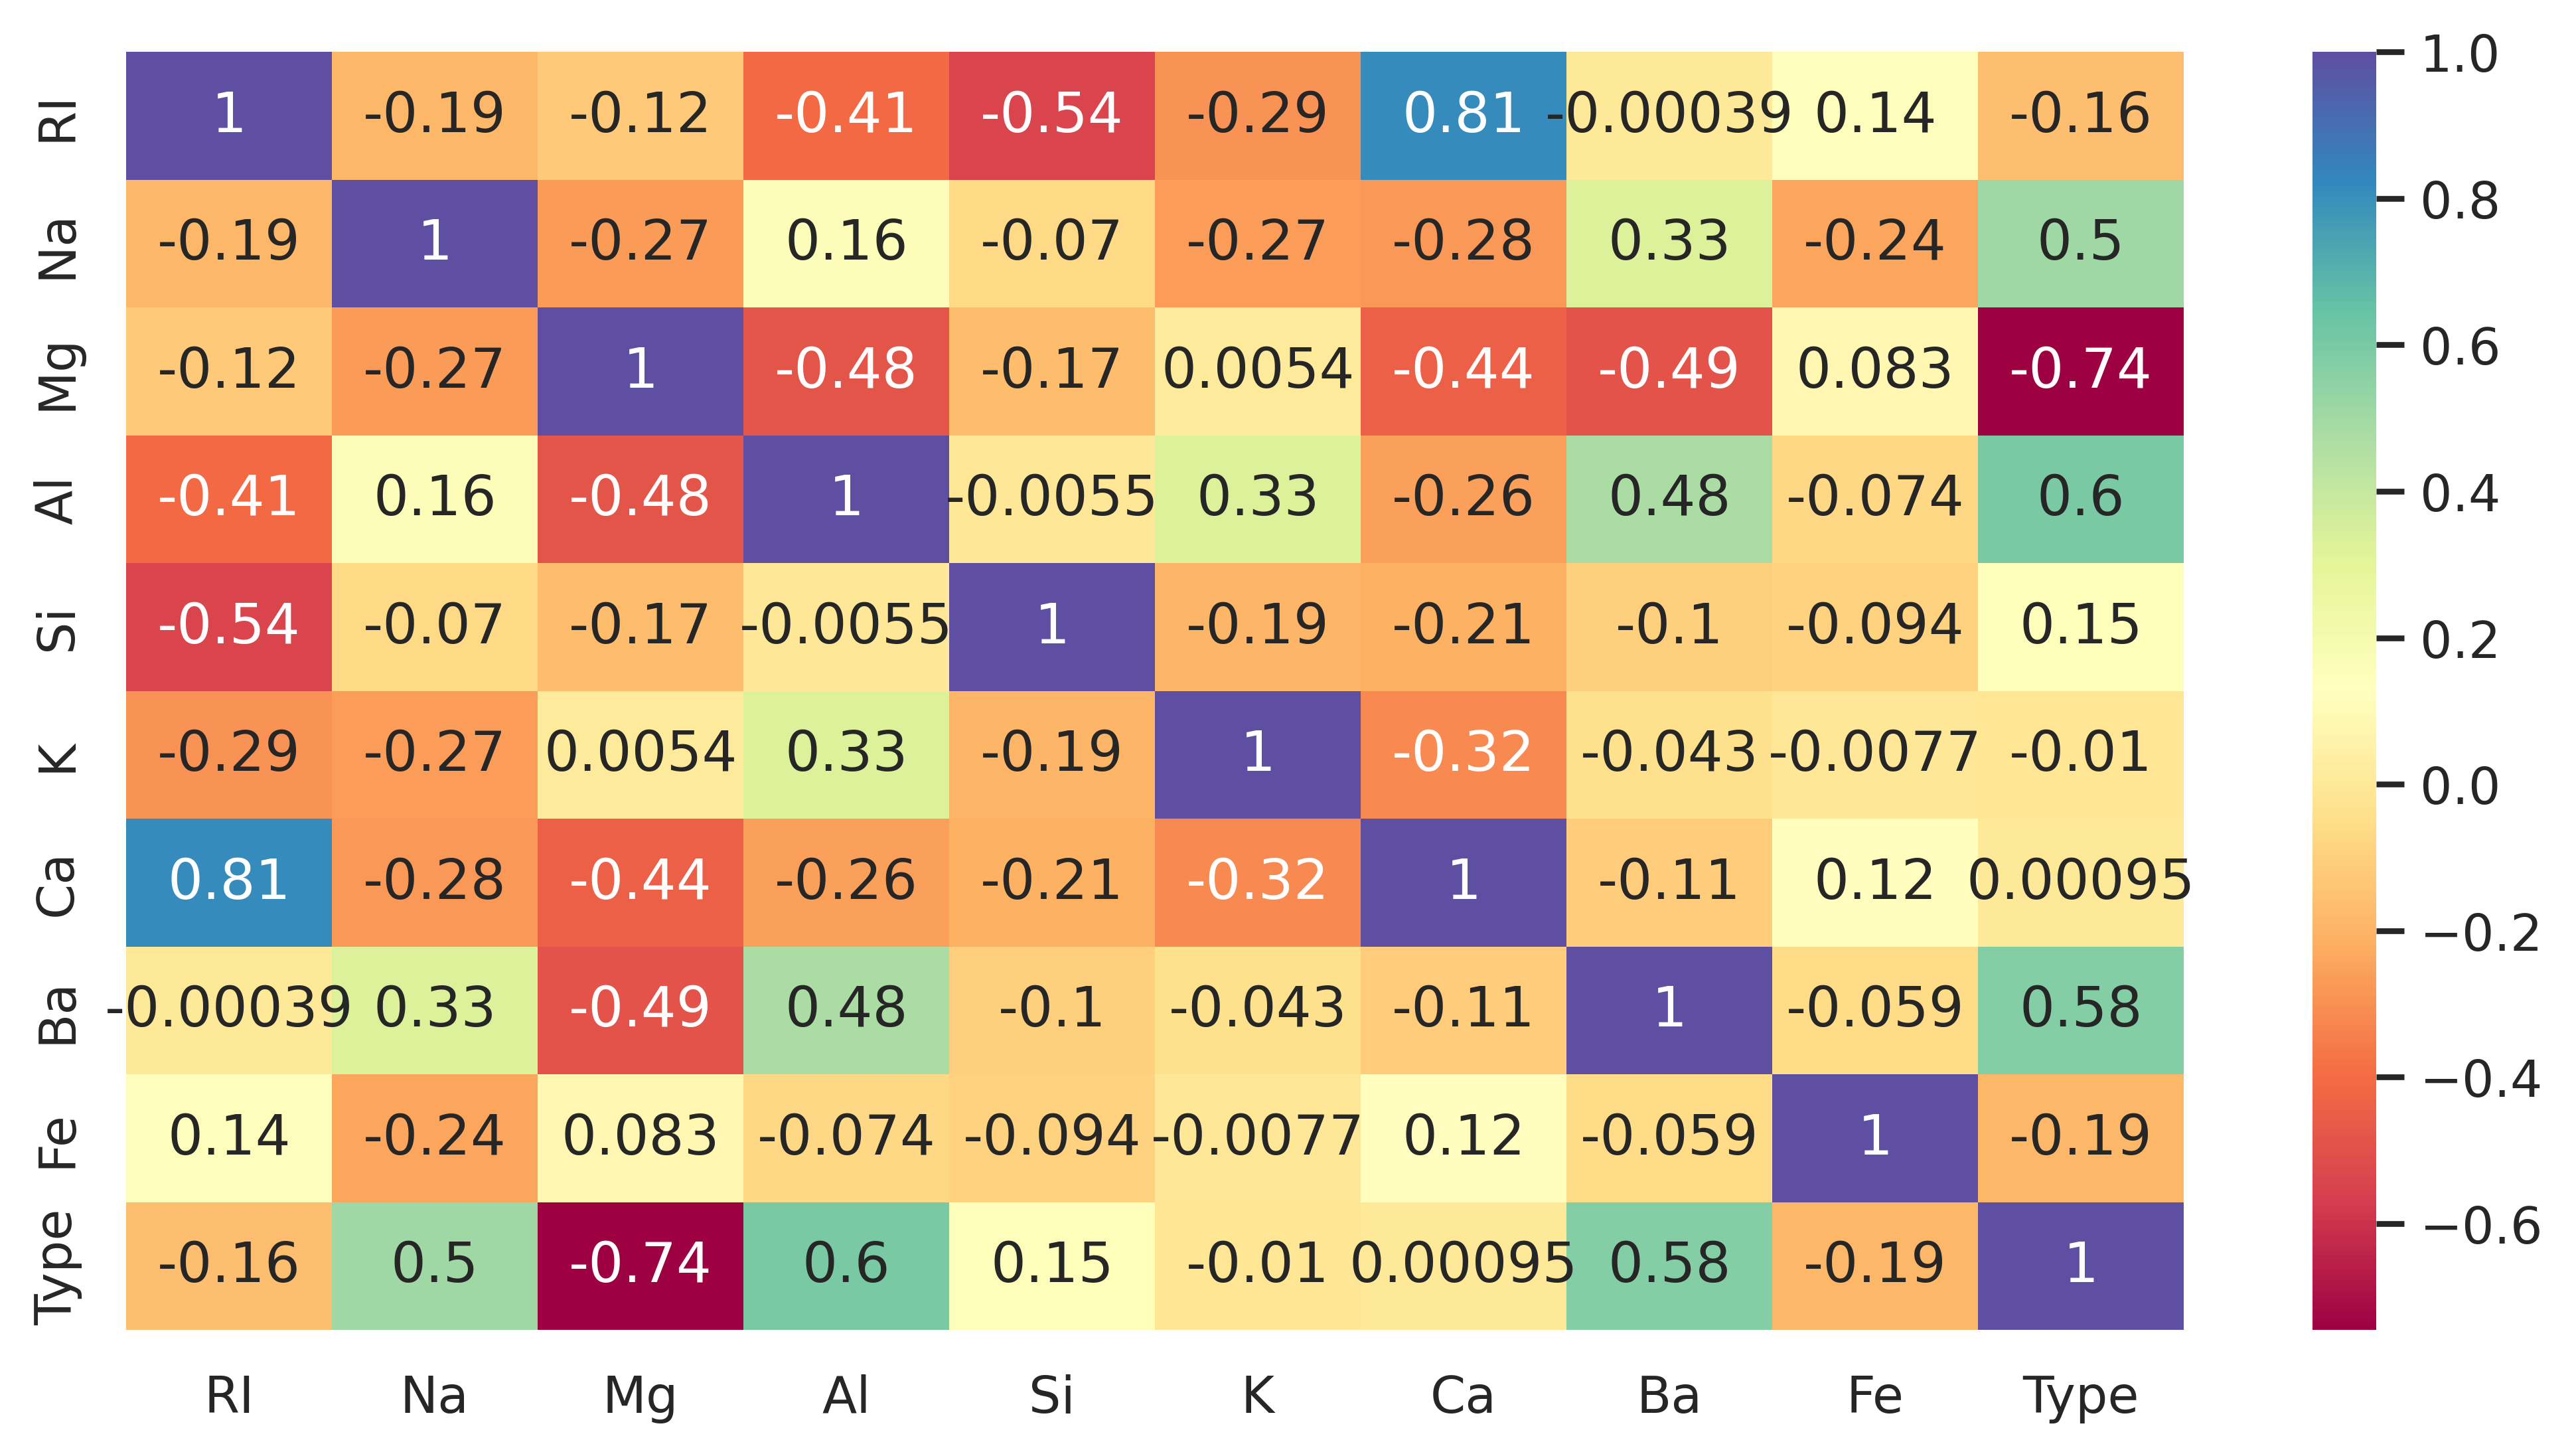

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='Spectral')

## Splitting the dataset in to training ang testing. ##

In [ ]:
x = df.iloc[:,:-1]
y = df['Type']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)

## Applying bagging method , Random forest itself is a bagging metod which includes creating multiple training datasets and training the algorithm. In this case it is decision tree classifier. The basic idea is to train several 'weak learners' simultaneuosly and considering the best result out of them. ##

In [ ]:
rfc = RandomForestClassifier(random_state=5)
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
yp

array([6, 7, 7, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 3, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 3, 2, 2, 1, 1, 7, 7, 1,
       7, 1, 2, 1, 2, 7, 1, 2, 2, 2, 5, 2, 7, 1, 2, 7, 2, 2, 2, 2, 1])

In [ ]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=953453411),
 DecisionTreeClassifier(max_features='sqrt', random_state=236996814),
 DecisionTreeClassifier(max_features='sqrt', random_state=1592283119),
 DecisionTreeClassifier(max_features='sqrt', random_state=1423042237),
 DecisionTreeClassifier(max_features='sqrt', random_state=887852006),
 DecisionTreeClassifier(max_features='sqrt', random_state=1562238070),
 DecisionTreeClassifier(max_features='sqrt', random_state=1797920144),
 DecisionTreeClassifier(max_features='sqrt', random_state=2059200585),
 DecisionTreeClassifier(max_features='sqrt', random_state=2097710088),
 DecisionTreeClassifier(max_features='sqrt', random_state=385778404),
 DecisionTreeClassifier(max_features='sqrt', random_state=479936231),
 DecisionTreeClassifier(max_features='sqrt', random_state=1703970750),
 DecisionTreeClassifier(max_features='sqrt', random_state=1142065563),
 DecisionTreeClassifier(max_features='sqrt', random_state=1521011312),
 DecisionTr

In [ ]:
len(rfc.estimators_)

100

In [ ]:
rfc.estimators_[10]

DecisionTreeClassifier(max_features='sqrt', random_state=479936231)

In [ ]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           1       0.81      0.88      0.85        25
           2       0.82      0.86      0.84        21
           3       0.67      0.29      0.40         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       0.89      0.89      0.89         9

    accuracy                           0.82        65
   macro avg       0.78      0.82      0.77        65
weighted avg       0.81      0.82      0.80        65



## The accuracy of the model is 82% ##

In [ ]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

## created a function to train the model and get the predictions and check accuracy of the predicted data. ##

In [ ]:
prediction(GradientBoostingClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.8307692307692308
              precision    recall  f1-score   support

           1       0.78      0.84      0.81        25
           2       0.91      0.95      0.93        21
           3       0.25      0.14      0.18         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         9

    accuracy                           0.83        65
   macro avg       0.82      0.82      0.82        65
weighted avg       0.80      0.83      0.82        65



## Using a boosting method GradientBoostingClassifier, we can see the accuracy increased by 1%. We will try to improve it further by fine tuning the model ##

In [ ]:
params = {
    'n_estimators' : [100,120,160],
    'learning_rate' : [0.7,0.8,0.9],
    'max_depth' : [4,6,8,12]
}

In [ ]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, verbose=1)

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.7, 0.8, 0.9],
                         'max_depth': [4, 6, 8, 12],
                         'n_estimators': [100, 120, 160]},
             verbose=1)

In [ ]:
grid.best_params_

{'learning_rate': 0.7, 'max_depth': 6, 'n_estimators': 100}

In [ ]:
prediction(GradientBoostingClassifier(learning_rate=0.8, max_depth=6, n_estimators=100))

Train Accuracy: 1.0
Test Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           1       0.77      0.96      0.86        25
           2       0.90      0.90      0.90        21
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         9

    accuracy                           0.85        65
   macro avg       0.78      0.81      0.79        65
weighted avg       0.77      0.85      0.81        65



## We can see that the accuracy is increased by 4% and now come to 85%. The boosting metod involves training the weak leaners sequentially wherein each weak learner focuses on improving the performance of its predecessors.Each weak learner corrects the errors made by the previous ones, gradually refining the overall model's performance. ##


## The basic difference between bagging and boosting methods is as follows. ##


1.   Bagging method trains all the weak learners simultaneusly whereas boosing
     method trains weak learners sequentially.
2.   In bagging all models have equal weights however in boosing the later
     models are weighted more to correct previous errors.

3.   Bagging reduces overfitting , boosting may cause overfitting if there are
     complex learners.
4.   Bagging introdouces randomness by using random subsets of the features
     however boosting introduces diversity by focusing on errors and adjusting
     weights dynamically.

5.   Examples of bagging Random forest, Bagged tress.
     Examples of boosting Adaboost, Gradient Boosting.














## Imbalance in the data can be handled by using following methods ##


1.   Resampling the Data :- Use a mix of oversampling and undersampling to
                            balance the dataset.
2.   Using Class Weights :- Assign the weights in such a way that importance is
                            given to minority class during training.

3.   Sampling within Cross-Validation :- Ensure oversampling or undersampling  
                                         is performed within each fold of cross-validation to prevent data leakage.    
4.   Anomaly Detection Techniques :- Treat the minority class as anomalies and
                                     use outlier detection methods to identify them.


5.   Use Ensemble techniques like random forest and boosting.







